In [23]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn import tree, externals

%load_ext gvmagic

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


In [24]:
df = pd.read_csv(os.path.join('pets.csv'))

In [25]:
df

,name,animal,size,friendly
0,Bo,snake,small,True
1,Miles,dog,small,True
2,Fifi,cat,small,False
3,Muffy,cat,small,True
4,Rufus,dog,large,True
5,Jebediah,snail,small,True
6,Aloysius,dog,large,False
7,Tom,cat,large,False


k-nearst will not work in this case as the model calculates the distance & will need integ numbers

Best model for categories, classification is tree 

And to use tree model, we need to convert these to 0/1 values

In [26]:
names_df= pd.get_dummies(df.name)
animal_df = pd.get_dummies(df.animal)
size_df = pd.get_dummies(df['size'])

In [27]:
X = pd.concat((names_df,animal_df,size_df),axis=1)
X

,Aloysius,Bo,Fifi,Jebediah,Miles,...,dog,snail,snake,large,small
0,0,1,0,0,0,...,0,0,1,0,1
1,0,0,0,0,1,...,1,0,0,0,1
2,0,0,1,0,0,...,0,0,0,0,1
3,0,0,0,0,0,...,0,0,0,0,1
4,0,0,0,0,0,...,1,0,0,1,0
5,0,0,0,1,0,...,0,1,0,0,1
6,1,0,0,0,0,...,1,0,0,1,0
7,0,0,0,0,0,...,0,0,0,1,0


In [28]:
c = df.friendly
c

0     True
1     True
2    False
3     True
4     True
5     True
6    False
7    False
Name: friendly, dtype: bool

In [29]:
model = tree.DecisionTreeClassifier().fit(X,c)

In [30]:
model.score(X,c)

1.0

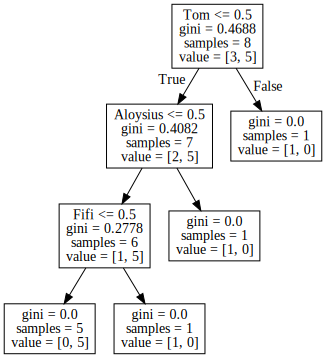

In [31]:
dot_data = externals.six.StringIO()
tree.export_graphviz(model, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()

### create feature to check if name start with A

In [35]:
name_start_with_A = df.name.str.startswith("A")
name_start_with_A

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
Name: name, dtype: bool

### create feature to check if name is less/more than 4 characters

In [36]:
up_to_4_letter_name = df.name.str.len() <= 4
up_to_4_letter_name

0     True
1    False
2     True
3    False
4    False
5    False
6    False
7     True
Name: name, dtype: bool

In [39]:
X = pd.concat((name_start_with_A,animal_df,size_df),axis=1)
model = tree.DecisionTreeClassifier().fit(X,c)
model.score(X,c)


0.875

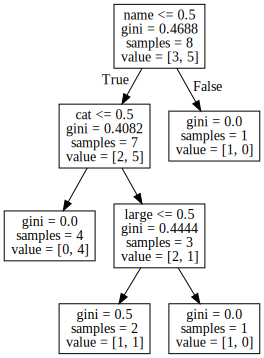

In [40]:
dot_data = externals.six.StringIO()
tree.export_graphviz(model, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()

In [41]:
X = pd.concat((up_to_4_letter_name,animal_df,size_df),axis=1)
model = tree.DecisionTreeClassifier().fit(X,c)
model.score(X,c)

0.875

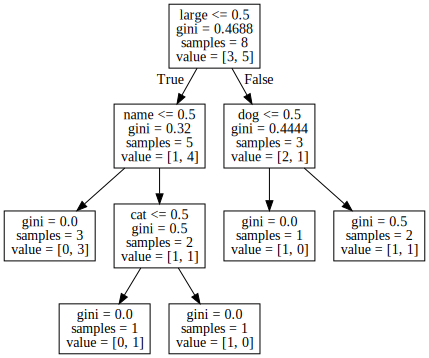

In [42]:
dot_data = externals.six.StringIO()
tree.export_graphviz(model, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()